**Введение**

В современном городском облике, где скорость и мобильность играют ключевую роль, сервисы аренды самокатов становятся неотъемлемой частью повседневной жизни. Наш анализ фокусируется на популярном сервисе GoFast, предоставляющем пользователям возможность совершать удобные и быстрые поездки по городу с использованием мобильного приложения.

Нами получены данные о пользователях из различных городов, а также информация о их поездках, включая детали использования абонентских подписок. Цель данного проекта — провести глубокий анализ данных с целью выявления закономерностей и проверки гипотез, способствующих развитию бизнеса GoFast.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subs = pd.read_csv('/datasets/subscriptions_go.csv')

#### Шаг 1. Загрузка данных

##### Пользователи:

In [2]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [3]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


##### Поездки:

In [4]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [5]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


##### Подписки:

In [6]:
subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [7]:
subs.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Вывод: на первый взгляд мы видим, что пустых значений нет, надо изменить тип данных на дату в таблице rides в столбце date и проверить, имеются ли дубликаты

#### Шаг 2. Предобработка данных

Пропуски в тиблице с пользователями

In [8]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропуски в таблице с поездками

In [9]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

Пропуски в таблице с подписками:

In [10]:
subs.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Рассмотрим столбцы и поменяем тип данных

In [11]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Добавим номер месяца:

In [12]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Найдем дубликаты:

In [13]:
users.duplicated().sum()

31

In [14]:
rides.duplicated().sum()

0

In [15]:
users = users.drop_duplicates()
users.duplicated().sum()

0

 Избавились от дубликатов и пустых значений, идем дальше

#### Шаг 3. Исследовательский анализ данных

Частота встречаемости городов:

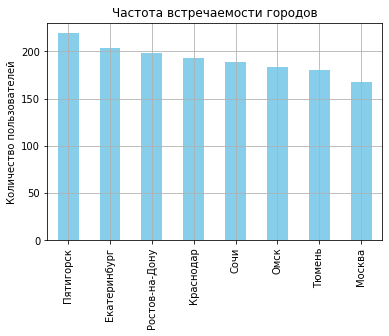

In [16]:
users['city'].value_counts().plot(kind='bar', color='skyblue', grid=True, title='Частота встречаемости городов')
plt.ylabel('Количество пользователей')
plt.show()

большим спросом сервис пользуется в Пятигорске, а меньшим в Москве

Соотношение пользователей с подпиской и без:

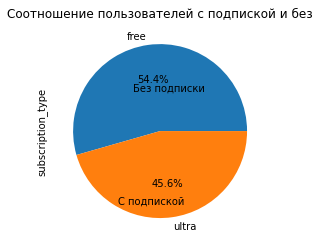

In [17]:
users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Соотношение пользователей с подпиской и без')
plt.title('Соотношение пользователей с подпиской и без')
plt.annotate('Без подписки', xy=(0.1, 0.5), ha='center', va='center', fontsize=10, color='black')
plt.annotate('С подпиской', xy=(-0.1, -0.8), ha='center', va='center', fontsize=10, color='black')
plt.show()

можно понять, что людей с подпиской 45 процентов, а людей юез 54 процента, что больше

Возраст пользователей:

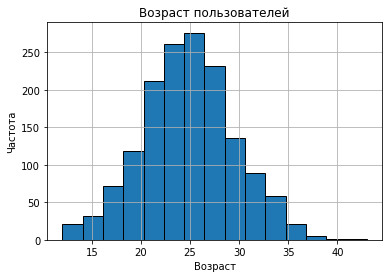

In [18]:
ax = users['age'].plot(kind='hist', bins=15, edgecolor='black', grid = 'True')
ax.set_title('Возраст пользователей')
ax.set_xlabel('Возраст')
ax.set_ylabel('Частота')
plt.show()

по графику видно, что сервис чаще пользуется спросом у людей возрастом от 20 до 28 лет

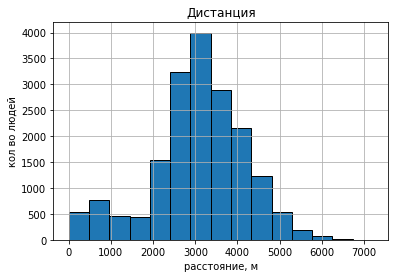

In [19]:
ax = rides['distance'].plot(kind='hist', bins=15, edgecolor='black', grid = 'True')
ax.set_title('Дистанция')
ax.set_xlabel('расстояние, м')
ax.set_ylabel('кол во людей')
plt.show()

по графику заметно, что большую часть поездок составляют поездки, с дистанцией от 2500 до 4000 метров

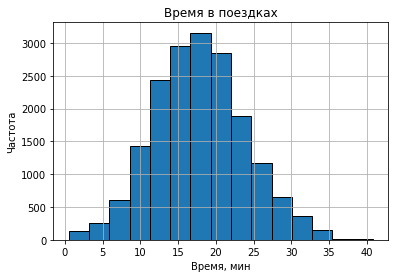

In [20]:
ax = rides['duration'].plot(kind='hist', bins=15, edgecolor='black', grid = 'True')
ax.set_title('Время в поездках')
ax.set_xlabel('Время, мин')
ax.set_ylabel('Частота')
plt.show()

По графику можно сделать вывод, что в осном, поездка длится от 15 до 25 минут

#### Шаг 4. Объединение данных

объединим три датасета в один и рассмотрим размерностб каждой таблицы отдельно:

In [21]:
rides.shape

(18068, 5)

In [22]:
users.shape

(1534, 5)

In [23]:
subs.shape

(2, 4)

In [24]:
data = users.merge(rides)
data = data.merge(subs)
data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [25]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [26]:
data.shape

(18068, 12)

Все размерности совпали, пропусков в новом датасете не обнаружено.

Создадим таблицу с пользователями без подписки:

In [27]:
no_sub = data.loc[data['subscription_type'] == 'free']
no_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Визуализируем информацию о расстоянии и времени поездок:

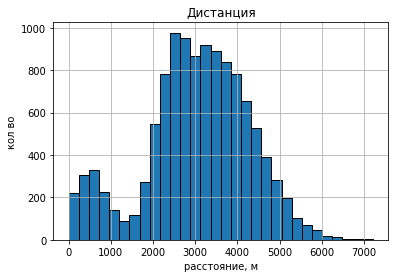

In [28]:
ax = no_sub['distance'].plot(kind='hist', bins=30, edgecolor='black', grid = 'True')
ax.set_title('Дистанция')
ax.set_xlabel('расстояние, м')
ax.set_ylabel('кол во')
plt.show()

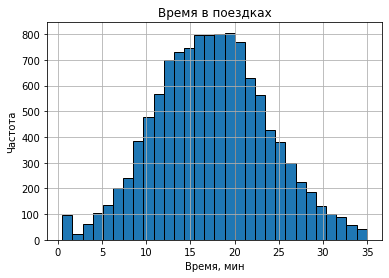

In [29]:
ax = no_sub['duration'].plot(kind='hist', bins=30, edgecolor='black', grid = 'True')
ax.set_title('Время в поездках')
ax.set_xlabel('Время, мин')
ax.set_ylabel('Частота')
plt.show()

Создадим таблицу пользователей с подпиской:

In [30]:
yes_sub = data.loc[data['subscription_type'] != 'free']
yes_sub.head(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


Визуализируем:

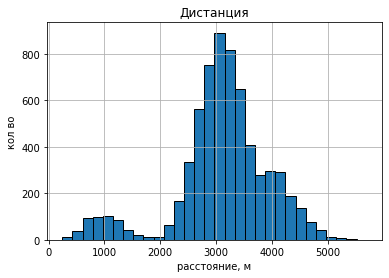

In [31]:
ax = yes_sub['distance'].plot(kind='hist', bins=30, edgecolor='black', grid = 'True')
ax.set_title('Дистанция')
ax.set_xlabel('расстояние, м')
ax.set_ylabel('кол во')
plt.show()

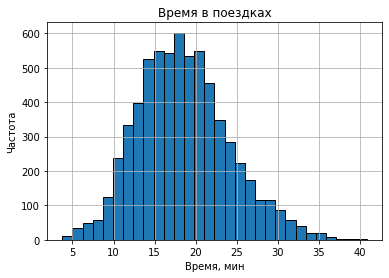

In [32]:
ax = yes_sub['duration'].plot(kind='hist', bins=30, edgecolor='black', grid = 'True')
ax.set_title('Время в поездках')
ax.set_xlabel('Время, мин')
ax.set_ylabel('Частота')
plt.show()

Вывод:
Объединили два датафрейма в один, создали датафрейм пользователей с подпиской и без.
По графикам видно, что пользователи без подписки совершают более долгие и длинные поездки.

#### Шаг 5. Подсчёт выручки

In [33]:
data['duration'] = np.ceil(data['duration'])

In [34]:
data_sum = pd.pivot_table(data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type'],
                           aggfunc = {'distance': sum, 
                                      'duration' : sum, 
                                      'name' : 'count', 
                                      'subscription_type' : min})
data_sum.columns = ['distance', 'duration', 'count', 'subscription_type']
#data_sum['duration'] = np.ceil(data_sum['duration'])
data_sum.head()

distance  duration  count subscription_type
month user_id                                                
1     1        7027.511294      42.0      2             ultra
      3        3061.777147      13.0      1             ultra
      5        3914.646990      13.0      1             ultra
      7        6478.080979      28.0      2             ultra
      12       3577.151148      33.0      1             ultra

In [35]:
def income(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    else:
        return 8 * row['duration'] + row['count'] * 50
data_sum['month_income'] = data_sum.apply(income, axis=1)
data_sum.head()

distance  duration  count subscription_type  month_income
month user_id                                                              
1     1        7027.511294      42.0      2             ultra         451.0
      3        3061.777147      13.0      1             ultra         277.0
      5        3914.646990      13.0      1             ultra         277.0
      7        6478.080979      28.0      2             ultra         367.0
      12       3577.151148      33.0      1             ultra         397.0

Вывод: создали новый датафрейм с информацией о длительности, расстоянии, сумме поездок и прибыли с каждого пользоватлея, за каждый месяц

#### Шаг 6. Проверка гипотез

тратят ли пользователи с подпиской больше времени на поездки?

6 1 Нулевая гипотеза: продолжительность поездок с подпиской и без равна

Ненулевая: продолжительность поездки с подпиской больше

In [36]:
results = st.ttest_ind(yes_sub['duration'], no_sub['duration'] ,alternative = 'greater')
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.2804098316645618e-34
Отвергаем нулевую гипотезу


значит продолжительность поездок без подписки не равно продолжительности поездок с подпиской

6 2 Нулевая гипотеза:  среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров


Ненулевая:  Подписчики в среднем проезжают расстояние больше оптимального

In [37]:
value = 3130.0
alpha = 0.05
results = st.ttest_1samp(yes_sub['distance'], value, alternative='greater')   
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


мы не можем утверждать, что подписчики в среднем проезжают расстояние больше оптимального.

6 3 Нулевая гипотеза: выручка пользователей с подпиской и без равна

Ненулевая: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

In [38]:
results = st.ttest_ind(data_sum.loc[data_sum['subscription_type'] == 'ultra']['month_income'], 
                       data_sum.loc[data_sum['subscription_type'] != 'ultra']['month_income'])
alpha = 0.05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

3.7700788769430433e-31
Отвергаем нулевую гипотезу


Мы можем утверждать что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

6 4: нам нужно будет сделать тест для старых данных и для измененных, которые зависят друг от друга и воспользуемся методом scipy.stats.ttest_rel(), что б узнать, будет ли количество обращений в поддержку до обновления равняться кол-ву обращений после обновления.

#### Общий вывод

Итак, мы загрузили три датафрейма, о пользователях, подписках и поездках, обработали дубликаты и пропуски, там где это было необходимо. Выяснили, что самый встречающийся город это пятигорск, пользователей с подпиской и без практически равное количество(пользователей с без подписки 54 %), чаще всего сервисом пользуются люди возрастом от 20 до 28 лет, и дистанция в основном варьируется от 2500 до 4000 метров, а так же, время поездки чаще всего в районе от 15 до 25 минут. Затем мы объединили три датасета в один, а так же создали еще 2 новых датасета с информацией о пользователях с подпиской и без и так же вывели графики по ним. Пятым шагом мы сделали сводную таблицу с информацией об выручке с каждого клиента за определенный месяц с помощью функции def income(). И 6 ым пунктом проверили все гипотезы используя т-тесты. Мы выяснили, что продолжительность поездки без подписки меньше чем с подпиской, мы не можем утверждать что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров, мы можем утверждать что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.